In [46]:
import matplotlib.pyplot as plt
import pandas as pd
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
name='rl_caching_strategy_'
directory = 'results/rl_caching_strategy/cache_capacity_2500/2019_05_09_02_53'
caching_strategy_dir = f'{directory}/caching_strategy'

Text(0.5, 0, 'Steps')

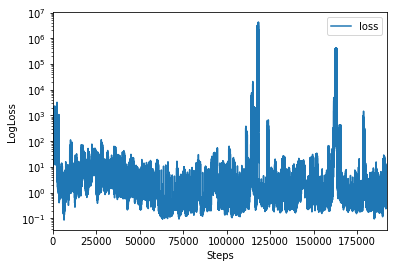

In [55]:
losses_df = pd.read_csv(f'{caching_strategy_dir}/{name}loss_logger.log', names=['timestamp','loss'], usecols=['loss'])
ax = losses_df.plot(y='loss', logy=True)
ax.set_ylabel("LogLoss")
ax.set_xlabel("Steps")

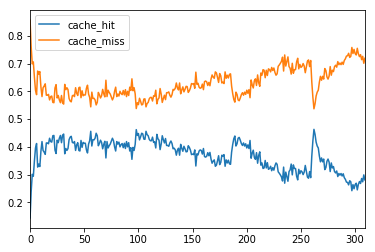

In [62]:
stats_df = pd.read_csv(f'{directory}/cache_hit_logger.log', names=['timestamp', 'key', 'cache_hit', 'cache_miss'], 
                       usecols=['cache_hit', 'cache_miss']
                       )
stats_df[['cache_hit','cache_miss']] = stats_df[['cache_hit', 'cache_miss']].astype(int)
stats_df.groupby((stats_df.index // 1000)).mean().plot()

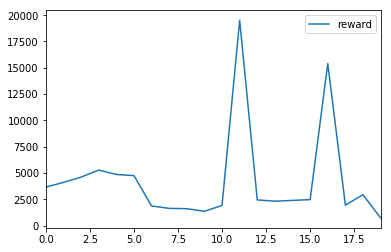

In [57]:
episode_reward_df = pd.read_csv(f'{caching_strategy_dir}/{name}reward_logger.log', names=['timestamp', 'reward'], usecols=['reward'])
episode_reward_df.groupby((episode_reward_df.index // 10000)).sum().plot()

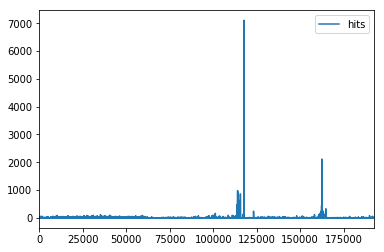

In [58]:
episode_reward_df = pd.read_csv(f'{caching_strategy_dir}/{name}entry_hits_logger.log', names=['timestamp', 
                                                                                              'key', 
                                                                                              'hits'], usecols=['hits'])
episode_reward_df.plot()


In [ ]:
directory = 'results/rl_caching_strategy_only_no_episodes/cache_capacity_50000/2019_04_15_13_13'
caching_strategy_dir = f'{directory}/caching_strategy'

In [ ]:
stats_df = pd.read_csv(f'{directory}/cache_hit_logger.log', names=['key', 'cache_hit', 'cache_miss'], parse_dates=True)
ax = stats_df.resample('1T').mean().plot()
ax.set_xlabel("Time")
ax.set_ylabel("Percentage")

In [ ]:
# Useful to compare various RL architecture 
episode_reward_df = pd.read_csv(f'{caching_strategy_dir}/reward_logger.log', names=['reward'], parse_dates=True)
ax = episode_reward_df.resample('1T').sum().plot(title='Sum of reward achieved')
ax.set_xlabel("Time")
ax.set_ylabel("Reward")

In [ ]:
losses_df = pd.read_csv(f'{caching_strategy_dir}/loss_logger.log', names=['loss'], parse_dates=True)
ax = losses_df.resample('1T').sum().plot(logy=True)
ax.set_ylabel("Loss")
ax.set_xlabel("Time")

In [ ]:
observations_df = pd.read_csv(f'{caching_strategy_dir}/observation_logger.log', names=['key', 'operation'], parse_dates=True)
ax = observations_df.groupby('operation').resample('1T').count().drop(['key'], axis=1).unstack(0).plot()
ax.legend(loc='upper right'